In [1]:
# IMPORT THE NECESSARY LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# LOAD THE DATASET

train= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [22]:
# LOAD THE   TEST dataset

test= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

# IN THIS JUPYTER NOTEBOOK we load two 'TRAIN & TEST dataset'  

# we do all ED analysis part over ' TRAIN dataset and also do (train & test the model )

# in last part we predict 'Outlet-Sales' over input-features of 'TEST DATASET' 

In [20]:

train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4233,NCY18,NaN,Low Fat,0.031001,Household,177.0054,OUT027,1985,Medium,Tier 3,Supermarket Type3,2101.2648
3976,FDJ32,NaN,Low Fat,0.057512,Fruits and Vegetables,62.5536,OUT027,1985,Medium,Tier 3,Supermarket Type3,1592.5936
5910,FDJ12,8.895,Regular,0.039009,Baking Goods,209.0296,OUT013,1987,High,Tier 3,Supermarket Type1,2285.0256
7335,NCU18,15.100,Low Fat,0.055794,Household,139.7496,OUT013,1987,High,Tier 3,Supermarket Type1,3952.1888
3744,FDN56,5.460,Regular,0.107663,Fruits and Vegetables,143.8786,OUT017,2007,NaN,Tier 2,Supermarket Type1,4334.3580


In [21]:
# checking shape of the  TRAIN dataset

train.shape

(8523, 12)

In [6]:
# checking the null_vallue of 'TRAIN' dataset

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
# impute the null-value in 'Item-Weight' according grouby 'Item_Weight' 

train['Item_Weight'].fillna(train.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace= True)

In [27]:
#
print(train['Item_Weight'].isnull().sum())


0


In [28]:
# statistical description

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
#  replace Item_Visibility=0 by  mean of 'Item_Type' 

#   first 0 value replace by np.nan
train['Item_Visibility']= train['Item_Visibility'].replace({0: np.nan})

# than impute all nan values by groupby 'Item_Visibility'
train['Item_Visibility'].fillna(train.groupby(['Item_Type'])['Item_Visibility'].transform('mean'), inplace=True)

In [30]:
# counts the 'Item Type' feature values

print(train['Item_Type'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

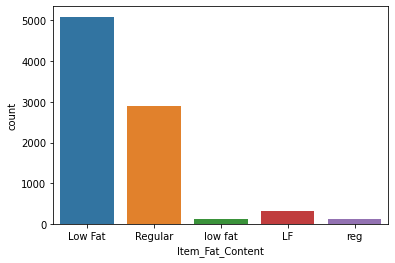

In [31]:
# Counting 'Item_fat_content' element

sns.countplot('Item_Fat_Content', data=train)

In [32]:
#
train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat' }, inplace=True)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

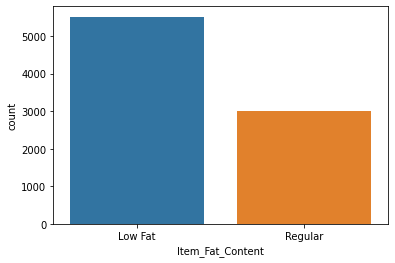

In [33]:
sns.countplot('Item_Fat_Content', data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

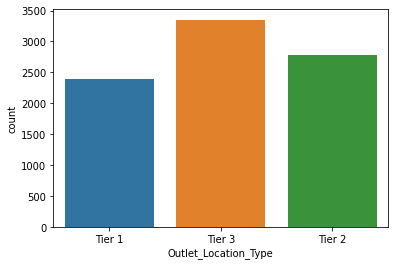

In [28]:
# Counting all value of 'Outlet_Location_Type' 
sns.countplot('Outlet_Location_Type', data=train)

In [29]:
#

train['Item_Identifier'].value_counts()

# 'Item_Identifier' length is 1559 

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [36]:
#
train['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:>

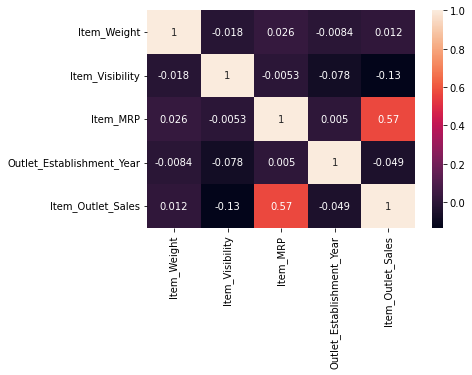

In [31]:
# checking correlation 

sns.heatmap(train.corr(),annot=True)

# no any features correlate the target_variable='Item_Outlet_sales' except 'Item_MRP'

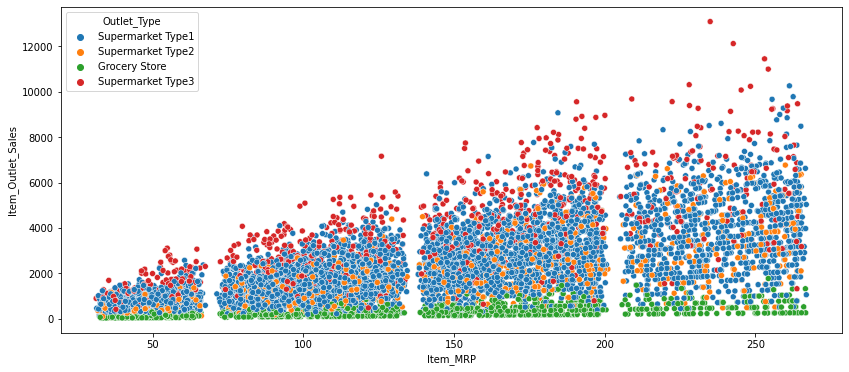

Supermarket_Type1 products-sales= (5577, 12) out of=(8523,12) 


In [38]:
# plotting scatterplot  

plt.figure(figsize=(14,6))
sns.scatterplot('Item_MRP','Item_Outlet_Sales', data=train, hue='Outlet_Type')
plt.show()

#  highest 'Item_MRP' price products selling are high
#    all over products are selling highest in  Supermarket_Type_1


Supermarket_1=train.loc[train['Outlet_Type']=='Supermarket Type1']

print('Supermarket_Type1 products-sales=',Supermarket_1.shape,'out of=(8523,12) ')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Identifier'>

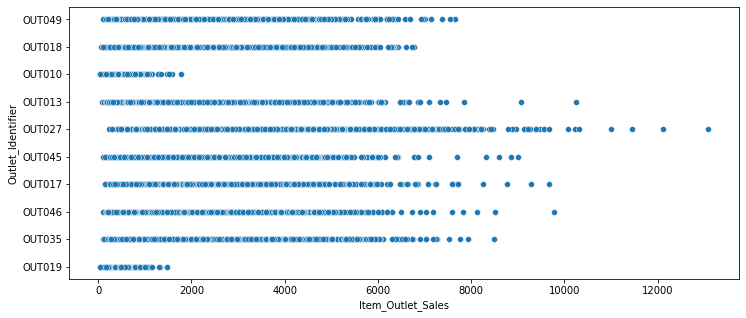

In [39]:
# plotting scatterplot

plt.figure(figsize=(12,5))
sns.scatterplot('Item_Outlet_Sales','Outlet_Identifier',data=train, )



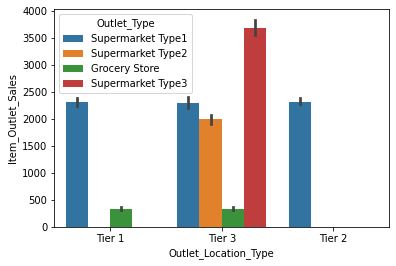

                                               mean       min         max
Outlet_Location_Type Outlet_Type                                         
Tier 1               Grocery Store       340.329723   33.9558   1482.0708
                     Supermarket Type1  2313.099451  101.8674   9779.9362
Tier 2               Supermarket Type1  2323.990559   99.8700   9664.7528
Tier 3               Grocery Store       339.351662   33.2900   1775.6886
                     Supermarket Type1  2298.995256   73.2380  10256.6490
                     Supermarket Type2  1995.498739   69.2432   6768.5228
                     Supermarket Type3  3694.038558  241.6854  13086.9648


In [34]:
#
sns.barplot( 'Outlet_Location_Type' ,'Item_Outlet_Sales', hue= 'Outlet_Type',data=train)
plt.show()

print(train.groupby(['Outlet_Location_Type','Outlet_Type'])['Item_Outlet_Sales'].aggregate(['mean','min','max']))

# 'Tier-3' 'supermarket-type-3 ' selling is high
#  grocery market selling is low 
# overall we see supermarket selling is high

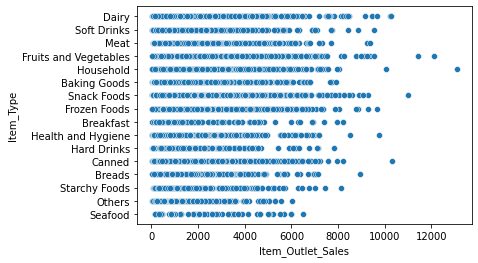

In [35]:
# plotting scatterplot 

sns.scatterplot('Item_Outlet_Sales','Item_Type',data=train,)
plt.show()

#   all product item sales is equally distributed
#  no any product sales is so less or so high shown in this distribution
# but some products sales are more = 'Dairy','Fruit & vegetables', 'Snack Food', Frozen Foods,canned , meat,soft drinks

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

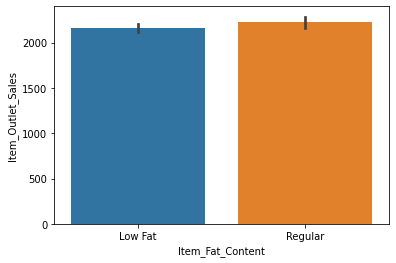

In [36]:
# plotting 'barplot' between 'Item_Fat_Content' and 'Item_Outlet_Sales'

sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data=train)

# 'Low Fat'- product & 'Regular'-product  sales are equally distributed

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Type'>

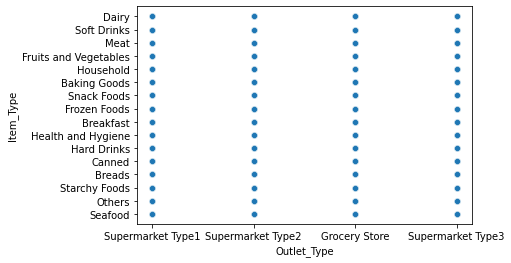

In [41]:
#
sns.scatterplot('Outlet_Type', 'Item_Type', data=train)

# in this graph , all products item equally selling in 'Outlet_Type'

In [44]:

pd.set_option('display.max_rows', None)

# we checking (mean, min, max)  of 'Item_Outlet_Sales'   by 'Item_Type' & 'Outlet_Type'

train.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].aggregate(['mean','min','max'])


#  all products are selling higher in SuperMarket_Type3

mean        min         max
Item_Type             Outlet_Type                                          
Baking Goods          Grocery Store       292.082544    37.2848    792.3020
                      Supermarket Type1  2102.021249   126.5020   7931.6754
                      Supermarket Type2  1780.368782   253.0040   5851.0504
                      Supermarket Type3  3248.872417   624.5204   7759.8990
Breads                Grocery Store       381.967442    35.2874   1524.0162
                      Supermarket Type1  2346.928355   167.7816   7064.8038
                      Supermarket Type2  2022.404489   167.7816   5660.6316
                      Supermarket Type3  3565.122748   984.7182   8958.3390
Breakfast             Grocery Store       412.831042    39.9480   1094.5752
                      Supermarket Type1  2228.334688   171.7764   6930.9780
                      Supermarket Type2  1874.670867   183.7608   6291.8100
                      Supermarket Type3  4584.759327  1518.0240   8209.3140
Canned                Grocery Store       352.864879    37.9506   1324.9420
                      Supermarket Type1  2348.732970   181.0976   7590.1200
                      Supermarket Type2  1867.714110   199.7400   6768.5228
                      Supermarket Type3  3779.866814   721.0614  10306.5840
Dairy                 Grocery Store       341.866589    40.6138   1314.9550
                      Supermarket Type1  2392.654389   149.8050  10256.6490
                      Supermarket Type2  2083.981362   105.8622   6275.1650
                      Supermarket Type3  3915.182245   905.4880  10236.6750
Frozen Foods          Grocery Store       322.285984    36.6190   1288.3230
                      Supermarket Type1  2259.909110   171.7764   9275.9256
                      Supermarket Type2  1995.641420    75.9012   6208.5850
                      Supermarket Type3  3553.621470   419.4540   9678.0688
Fruits and Vegetables Grocery Store       319.750450    45.2744   1342.2528
                      Supermarket Type1  2399.947642   111.8544   8994.9580
                      Supermarket Type2  1951.642279   123.8388   6331.7580
                      Supermarket Type3  4114.487061   417.4566  12117.5600
Hard Drinks           Grocery Store       243.155708    37.9506    756.3488
                      Supermarket Type1  2231.408037   308.9312   7843.1240
                      Supermarket Type2  2247.528955   452.7440   4586.0304
                      Supermarket Type3  3432.951643   796.9626   7152.0236
Health and Hygiene    Grocery Store       365.901818    34.6216   1482.0708
                      Supermarket Type1  2127.626505   145.8102   9779.9362
                      Supermarket Type2  1876.649134   227.7036   5626.0100
                      Supermarket Type3  3318.069783   241.6854   7142.7024
Household             Grocery Store       367.286612    33.2900   1775.6886
                      Supermarket Type1  2407.403432    73.2380   7240.5750
                      Supermarket Type2  2065.970392    69.2432   6439.6176
                      Supermarket Type3  3821.207782   293.6178  13086.9648
Meat                  Grocery Store       387.525864    47.9376   1575.2828
                      Supermarket Type1  2260.875454   181.0976   6331.7580
                      Supermarket Type2  2057.727270    78.5644   6729.9064
                      Supermarket Type3  3862.293911   641.8312   9390.4432
Others                Grocery Store       288.094126    39.9480    815.6050
                      Supermarket Type1  2244.418022   221.0456   6008.8450
                      Supermarket Type2  1853.620490   131.8284   5287.7836
                      Supermarket Type3  2700.928667   717.7324   5546.1140
Seafood               Grocery Store       228.435980   149.8050    431.4384
                      Supermarket Type1  2640.196610   207.7296   6503.5344
                      Supermarket Type2  3166.639914   415.4592   5992.2000
                    

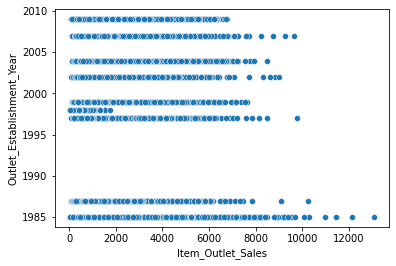

In [38]:
#plotting  scatterplot

sns.scatterplot('Item_Outlet_Sales', 'Outlet_Establishment_Year', data=train)
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

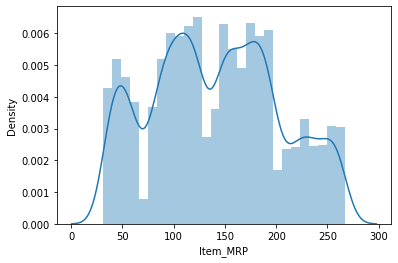

In [42]:
# plotting distplot of 'Item_MRP' to see distribution

sns.distplot(train['Item_MRP'])

# Item_MRP  range is distributed in 40 to 220

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

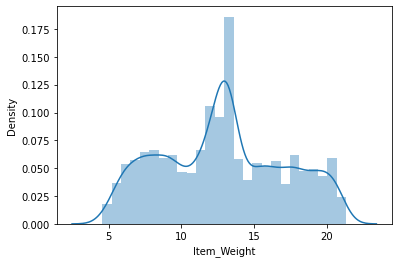

In [43]:
# plotting distplot of 'Item_Weight' to see distribution
sns.distplot(train['Item_Weight'])



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

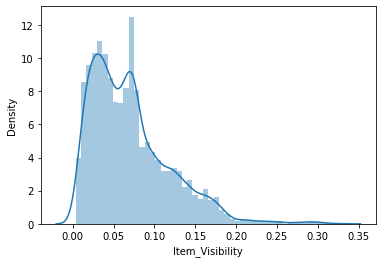

In [44]:
# plotting scatterplot

sns.distplot(train['Item_Visibility'])

In [52]:
# Checking outliers

from scipy.stats import zscore

print((np.abs(zscore(train[['Item_MRP','Item_Weight','Item_Visibility']]))<3).all())

# these features are continuous


Item_MRP            True
Item_Weight         True
Item_Visibility    False
dtype: bool


In [53]:
# REMOVING OUTLIER by ZSCORE METHOD

from scipy.stats import zscore

z_scores=zscore(train[['Item_Weight','Item_Visibility','Item_MRP']])
X_new=train.loc[(abs(z_scores)<3).all(axis=1)]


In [54]:
print('original_shape=',train.shape)
print('new dataset shape after removing outliers=',X_new.shape)

original_shape= (8523, 12)
new dataset shape after removing outliers= (8425, 12)


In [56]:
# 

X_new[['Item_MRP','Item_Weight','Item_Visibility']].skew()

Item_MRP           0.128614
Item_Weight        0.088632
Item_Visibility    0.848469
dtype: float64

In [57]:
# REMOVING SKEWNESS
X_new['Item_Visibility']= np.sqrt(X_new['Item_Visibility'])

In [58]:
X_new['Item_Visibility'].skew()

0.2091551472655731

In [59]:
# removing some unimportant features

x = X_new.drop(['Item_Identifier','Outlet_Size','Outlet_Establishment_Year', 'Item_Outlet_Sales',], axis=1, ) 

In [60]:
# categorical feature convert into numeric by pandas get_dummies function

x=pd.get_dummies(x ,drop_first=True)

In [61]:
x.head(4)   # input features

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.126678,249.8092,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,0.138846,48.2692,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0.129461,141.6180,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,0.271512,182.0950,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# target_variable

y= X_new.Item_Outlet_Sales

In [63]:
print(x.shape)

print(y.shape)

(8425, 33)
(8425,)


In [64]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
scaled= sc.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [67]:
# RANDOMFOREST
# IN TRAINING PROCESS         # finding best random_state for  

from sklearn.ensemble import RandomForestRegressor

max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    rf = RandomForestRegressor(n_estimators=160,max_depth=6,)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.5840863593617336  random_state is : 60
maximum accuracy : 0.5986190738911861  random_state is : 61
maximum accuracy : 0.6068077474276296  random_state is : 71
maximum accuracy : 0.6251344036777398  random_state is : 87


In [137]:
# RANDOM FOREST REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 87,test_size=0.25,)
rf= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=2)

rf.fit(x_train,y_train)
pred= rf.predict(x_test)

print('r2_score= ',r2_score(y_test,pred))
print('mean_squared_error= ',mean_squared_error(y_test,pred))

r2_score=  0.6288106874202852
mean_squared_error=  1069783.9008432804


In [100]:
# RANDOM FOREST REGRESSOR  with scaled input-variables

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 87,test_size=0.25,)
rf= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=2)

rf.fit(x_train,y_train)
pred= rf.predict(x_test)

print('r2_score= ',r2_score(y_test,pred))

# accuracy is same , we put scaled and unscaled input-variable data  in randomforest model but no difference in accuracy seen

r2_score=  0.6281906948111464


In [83]:
# MLP_REGRESSOR
                        # IN TRAINING PROCESS         # finding best random_state for  MLP
from sklearn.neural_network import MLPRegressor

max_acu= 0
max_rs= 0
for r_state in range(60,120):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.25,)
    mlp = MLPRegressor()
    mlp.fit(x_train,y_train)
    y_pred=mlp.predict(x_test)
    accu = r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.566116171046156  random_state is : 60
maximum accuracy : 0.5854151841392417  random_state is : 61
maximum accuracy : 0.5862296840714297  random_state is : 70
maximum accuracy : 0.5897319550113009  random_state is : 71
maximum accuracy : 0.593784780226404  random_state is : 78
maximum accuracy : 0.6090848920277374  random_state is : 87


In [138]:
# MLP REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 87,test_size=0.25,)
mlp= MLPRegressor()

mlp.fit(x_train,y_train)
pred= mlp.predict(x_test)

print('r2_score= ',r2_score(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

r2_score=  0.6072786345023111
mean_squared_error 1131840.2230031686


In [70]:
#    ADABOOST REGRESSOR   
                        # IN TRAINING PROCESS          # finding best random_state for  
from sklearn.ensemble import AdaBoostRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.25,)
    adb = AdaBoostRegressor(n_estimators=100,learning_rate=0.7,)
    adb.fit(x_train,y_train)
    y_pred=adb.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.4413116970471038  random_state is : 50
maximum accuracy : 0.4497723486229427  random_state is : 55
maximum accuracy : 0.4780370746594458  random_state is : 58
maximum accuracy : 0.48561854067461596  random_state is : 78
maximum accuracy : 0.49256345059468953  random_state is : 103
maximum accuracy : 0.5047510732838101  random_state is : 137


In [147]:
# ADABOOST REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 137,test_size=0.25,)
ad= AdaBoostRegressor(n_estimators=100,learning_rate=0.7,)

ad.fit(x_train,y_train)
pred= ad.predict(x_test)

print('r2_score with AdaBoost = ',r2_score(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

r2_score with AdaBoost =  0.49359124639956986
mean_squared_error 1532239.5549969762


In [149]:
# USING GRADIENT BOOSTING
                           # IN TRAINING PROCESS          # finding best random_state for  
from sklearn.ensemble import GradientBoostingRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,130):
    x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,)
    gb = GradientBoostingRegressor(n_estimators=150)
    
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.5974780821681951  random_state is : 50
maximum accuracy : 0.6213887988952933  random_state is : 55


In [150]:
# USING GRADIENTBOOSTING REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 55,test_size=0.25,)
gb= GradientBoostingRegressor(n_estimators=150,)

gb.fit(x_train,y_train)
pred= gb.predict(x_test)

print('r2_score with AdaBoost = ',r2_score(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

r2_score with AdaBoost =  0.6211447646880957
mean_squared_error 1115663.1970106424


In [72]:
#  FIT MODEL WITH USING PCA 

from sklearn.decomposition import PCA

pca= PCA()
pca.fit_transform(scaled)

array([[-9.00433240e-01,  1.96164505e-02,  1.76537555e+00, ...,
         2.33437095e-16,  2.04579308e-15,  3.88684190e-16],
       [ 3.06041770e+00,  3.16618534e+00, -1.09158477e+00, ...,
         5.00571613e-16, -2.47225281e-15, -1.14301656e-15],
       [-8.16920216e-01, -8.87878511e-02,  1.69809366e+00, ...,
        -1.30448276e-15,  1.37688367e-15, -1.50107324e-15],
       ...,
       [-1.97438737e+00, -4.21947011e-02, -1.34149235e+00, ...,
         8.21368702e-18,  7.99790560e-17, -2.92837714e-17],
       [ 3.14576794e+00,  3.21178936e+00, -9.63955495e-01, ...,
        -2.10532296e-17,  9.58587790e-18,  2.54158288e-17],
       [-8.98378109e-01, -7.99343481e-03,  1.64631888e+00, ...,
        -2.71398976e-16, -8.11868650e-17,  1.20341946e-16]])

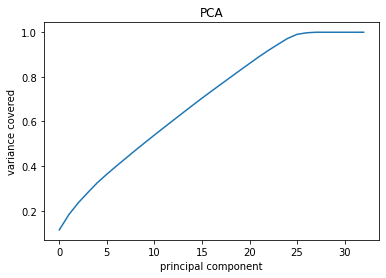

In [73]:

#  let's plot scree plot to check the how many feature are covered more 
                                            #            variance (that called best component)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal component')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()


In [74]:
#
pca= PCA(n_components= 22)
new_comp= pca.fit_transform(scaled)
p_comp= pd.DataFrame(new_comp, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'
                                        'pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23',])

In [75]:
# DECISION TREE REGRESSOR with input_variable pca-component

# IN TRAINING PROCESS          # finding best random_state for  

from sklearn.tree import DecisionTreeRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,110):
    x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = r_state,test_size=0.25,)
    dt = DecisionTreeRegressor()
    
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)


maximum accuracy : 0.08541678331039582  random_state is : 50
maximum accuracy : 0.10986397965268768  random_state is : 51
maximum accuracy : 0.14877847103933695  random_state is : 54
maximum accuracy : 0.1496924798035958  random_state is : 55
maximum accuracy : 0.15911458910496257  random_state is : 62
maximum accuracy : 0.1870793451762105  random_state is : 66


In [80]:
# GRADIENTBOOSTING  with input variable pca_component

# IN TRAINING PROCESS          # finding best random_state for  

from sklearn.ensemble import GradientBoostingRegressor

max_acu= 0
max_rs= 0
for r_state in range(50,110):
    x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = r_state,test_size=0.25,)
    gb = GradientBoostingRegressor()
    
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    accu = r2_score(y_test,y_pred)
        
    if accu>max_acu:
        max_acu=accu
        max_rs= r_state
        print("maximum accuracy :",max_acu," random_state is :",max_rs)

# this model fit with pca component but not give score more then compare to without using  pca_method


maximum accuracy : 0.5384566310486629  random_state is : 50
maximum accuracy : 0.5623147730158735  random_state is : 55
maximum accuracy : 0.5646395235142192  random_state is : 87


In [152]:
# USING GRADIENTBOOSTING REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(p_comp, y,random_state = 87,test_size=0.25,)
gb= GradientBoostingRegressor(n_estimators=150,)

gb.fit(x_train,y_train)
pred= gb.predict(x_test)

print('r2_score with AdaBoost = ',r2_score(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

r2_score with AdaBoost =  0.5767501525433834
mean_squared_error 1219824.6487665905


In [158]:
# USING SVR

from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 1137,test_size=0.25,)
svm= SVR()

svm.fit(x_train,y_train)
pred= svm.predict(x_test)

print('r2_score with AdaBoost = ',r2_score(y_test,pred))
print('mean_squared_error',mean_squared_error(y_test,pred))

r2_score with AdaBoost =  0.18759754711980936
mean_squared_error 2421188.9308075565


In [159]:
from sklearn.model_selection import KFold
kfold= KFold(n_splits=15, shuffle=True, random_state=459)

from sklearn.model_selection import cross_val_score as CVS
def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())


In [161]:
# CROSS_VALIDATION SCORE WITH   RANDOMFOREST_REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 87,test_size=0.25,)

cross_val(rf,x_train,y_train,'RandomForest_R')


cross_val_score with RandomForest_R = 0.5779058968536451


In [165]:
# CROSS_VALIDATION SCORE WITH   GRADIENTBOOSTING_REGRESSOR

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 55,test_size=0.25,)

cross_val(rf,x_train,y_train,'GradienBoosting_Regressor')


cross_val_score with GradienBoosting_Regressor = 0.575441338144386


In [167]:
from sklearn.model_selection import GridSearchCV
gbr= GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 55,test_size=0.25,)

param= {'n_estimators':[100,180],'max_depth':[3,5],'min_samples_split':[2,3],'min_samples_leaf':[1,2],
        'learning_rate':[0.1,1.0],'subsample':[0.7,0.8,1.0]}
grid= GridSearchCV(gbr,param, cv=6,n_jobs=-1)

grid.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 180],
                         'subsample': [0.7, 0.8, 1.0]})

In [182]:
reg= grid.best_estimator_

reg.fit(x_train,y_train)
pred= reg.predict(x_test)

print('r2_score=', r2_score(y_test,pred))

r2_score= 0.6201608869931408


In [183]:
import pickle

big_data_mart_sales= 'big_data_mart_sales.pickle'

In [185]:
pickle.dump(reg,open(big_data_mart_sales, 'wb'))

In [186]:
model= pickle.load(open(big_data_mart_sales, 'rb'))

In [ ]:
#  THIS TRAIN DATASET MODEL COMPLETE

# WE DONE TRAIN & TEST OVER THE MODEL AND SAVE THE MODEL

In [195]:
test.head(3)


# this dataset  is part of  'train_dataset' 
#  but only 'sales' target_variable is missing
#  we don't so much analysis the test dataset  only  predicting  on this dataset


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [196]:
test.shape

(5681, 11)

In [197]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [198]:
# impute the null in 'Item_Weight' by groupyby 'Item_Type' feature

test['Item_Weight'].fillna(test.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace= True)


In [199]:
#
test['Item_Weight'].isnull().sum()

0

In [200]:
# descriptive information
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.694378,0.065684,141.023273,1997.828903
std,4.252967,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.684256,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [201]:
 
#   first 0 value replace by np.nan
test['Item_Visibility']= test['Item_Visibility'].replace({0: np.nan})

# than impute all nan values in 'Item_Visibility' by groupby 'Item_Type'
test['Item_Visibility'].fillna(test.groupby(['Item_Type'])['Item_Visibility'].transform('mean'), inplace=True)

In [202]:
# counting 'Item_Type' 
test['Item_Type'].value_counts()



Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

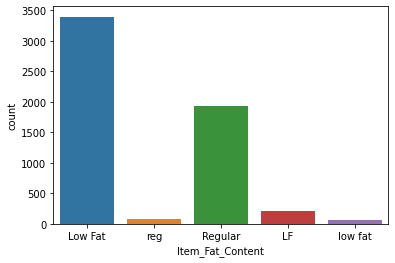

In [203]:
#
sns.countplot(test['Item_Fat_Content'])

In [222]:
#
test['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat' }, inplace=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

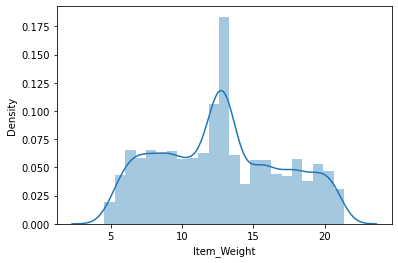

In [205]:
#
sns.distplot(test['Item_Weight'])

# this distribition same as train['Item_Weight'] features distribution

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

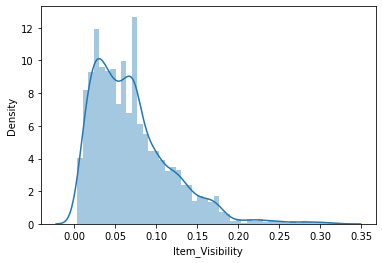

In [206]:
#
sns.distplot(test['Item_Visibility'])

# this distribition same as train['Item_Visibility'] features distribution
# SHOW skewness in this distribution

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

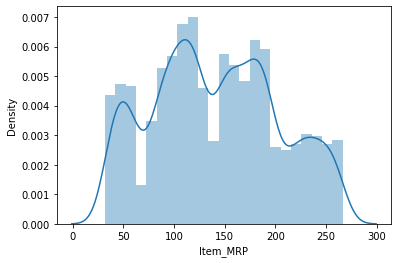

In [207]:
sns.distplot(test['Item_MRP'])

In [208]:
# Checking outliers

from scipy.stats import zscore

np.abs(zscore(test[['Item_MRP','Item_Weight','Item_Visibility']])<3).all()

# these features are continuous

Item_MRP            True
Item_Weight         True
Item_Visibility    False
dtype: bool

In [227]:
# REMOVING OUTLIER by ZSCORE METHOD

from scipy.stats import zscore

z_scores=zscore(test[['Item_Weight','Item_Visibility','Item_MRP']])
x_new=test.loc[(abs(z_scores)<3).all(axis=1)]


In [228]:
print('original-shape=',test.shape)
print('test_dataset_shape after removing outliers',x_new.shape)

original-shape= (5681, 11)
test_dataset_shape after removing outliers (5648, 11)


In [229]:
# checking skewness on continuous features

x_new[['Item_MRP','Item_Weight','Item_Visibility']].skew()

# test_dataset skewness result same like train_dataset

Item_MRP           0.134521
Item_Weight        0.142818
Item_Visibility    0.294802
dtype: float64

In [230]:
# REMOVING SKEWNESS

test['Item_Visibility']= np.sqrt(test['Item_Visibility'])

# checking again skewness after     removing skewness
test['Item_Visibility'].skew()

-0.03328365232719442

In [231]:
# removing unimportant features those 0% related target_variable , we seen above train_dataset

X= x_new.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Size'], axis=1)


In [232]:
# input variable
x1= pd.get_dummies(X, drop_first=True)

In [233]:
x1.head(4)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.086976,107.8622,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,8.300,0.196030,87.3198,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,14.600,0.315555,241.7538,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315,0.124050,155.0340,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [235]:
model.predict(x1)

array([1609.01669311, 1409.43585866, 1609.18150396, ..., 1869.39457799,
       3583.0840057 , 1314.65067449])

In [ ]:
#  we tried 'RandomForest' with 'scaled' and 'unscaled' input_features but both given same score

# 'MLP_regressor' given best score with unscaled input data